In [1]:
#step1 importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#step2 reading data
df=pd.read_csv("inventory_data_enriched.csv")

In [3]:
#step3 no of numerical and categorical columns in the datasets
numerical_columns=df.select_dtypes(include=[np.number]).columns
categorical_columns=df.select_dtypes(exclude=[np.number]).columns
print("numerical columns:",len(numerical_columns))
print("categorical columns",len(categorical_columns))

numerical columns: 14
categorical columns 5


In [4]:
df.columns

Index(['Dealer_ID', 'Product_ID', 'Date', 'Quantity', 'Consumption',
       'Location', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Season',
       'Lag_Quantity', 'Lag_Consumption', 'RollingAvg_Quantity_7',
       'RollingAvg_Consumption_7', 'RollingAvg_Quantity_30',
       'RollingAvg_Consumption_30', 'Consumption_Rate'],
      dtype='object')

In [5]:
#step4 checking for null values
df.isna().sum()#there is no null values so we dont do any change

Dealer_ID                      0
Product_ID                     0
Date                         410
Quantity                      92
Consumption                   92
Location                     184
Year                         410
Month                        410
Day                          410
DayOfWeek                    410
IsWeekend                      0
Season                         0
Lag_Quantity                   0
Lag_Consumption                0
RollingAvg_Quantity_7          1
RollingAvg_Consumption_7       1
RollingAvg_Quantity_30         1
RollingAvg_Consumption_30      1
Consumption_Rate               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing values
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
Date                         410
Day                          410
Month                        410
Year                         410
DayOfWeek                    410
Location                     184
Consumption                   92
Quantity                      92
RollingAvg_Quantity_7          1
RollingAvg_Consumption_7       1
RollingAvg_Quantity_30         1
RollingAvg_Consumption_30      1
dtype: int64


In [8]:
# Fill missing 'Date' related values with forward fill method
df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek']] = df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek']].fillna(method='ffill')

# Fill missing 'Location' with "Unknown"
df['Location'] = df['Location'].fillna("Unknown")

# Fill missing numerical values with their median
num_cols = ['Quantity', 'Consumption', 'RollingAvg_Quantity_7', 'RollingAvg_Consumption_7',
            'RollingAvg_Quantity_30', 'RollingAvg_Consumption_30']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verify missing values after handling
df.isnull().sum()


C:\Users\VENKATESHWAR REDDY\AppData\Local\Temp\ipykernel_19932\2318656727.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek']] = df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek']].fillna(method='ffill')


Dealer_ID                    0
Product_ID                   0
Date                         0
Quantity                     0
Consumption                  0
Location                     0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
IsWeekend                    0
Season                       0
Lag_Quantity                 0
Lag_Consumption              0
RollingAvg_Quantity_7        0
RollingAvg_Consumption_7     0
RollingAvg_Quantity_30       0
RollingAvg_Consumption_30    0
Consumption_Rate             0
dtype: int64

from sklearn.preprocessing import LabelEncoder
import joblib

df = pd.read_csv("your_dataset.csv")

# Make sure all season types are covered in your dataset:
print(df['Season'].unique())  # Make sure it includes 'Monsoon', etc.

encoder = LabelEncoder()
df['Season'] = encoder.fit_transform(df['Season'])

# Save the encoder
joblib.dump(encoder, 'season_encoder_stockout.pkl')


In [11]:
print(df['Product_ID'].unique())


['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']


In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# Remove duplicate rows if any
df = df.drop_duplicates()


Number of Duplicate Rows: 0


In [10]:
#step7 converting the data types if needed
df.dtypes

Dealer_ID                     object
Product_ID                    object
Date                          object
Quantity                     float64
Consumption                  float64
Location                      object
Year                         float64
Month                        float64
Day                          float64
DayOfWeek                    float64
IsWeekend                      int64
Season                        object
Lag_Quantity                 float64
Lag_Consumption              float64
RollingAvg_Quantity_7        float64
RollingAvg_Consumption_7     float64
RollingAvg_Quantity_30       float64
RollingAvg_Consumption_30    float64
Consumption_Rate             float64
dtype: object

In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert categorical columns to category type
df['Dealer_ID'] = df['Dealer_ID'].astype('category')
df['Product_ID'] = df['Product_ID'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Season'] = df['Season'].astype('category')

# Verify data types
df.dtypes


Dealer_ID                          category
Product_ID                         category
Date                         datetime64[ns]
Quantity                            float64
Consumption                         float64
Location                           category
Year                                float64
Month                               float64
Day                                 float64
DayOfWeek                           float64
IsWeekend                             int64
Season                             category
Lag_Quantity                        float64
Lag_Consumption                     float64
RollingAvg_Quantity_7               float64
RollingAvg_Consumption_7            float64
RollingAvg_Quantity_30              float64
RollingAvg_Consumption_30           float64
Consumption_Rate                    float64
dtype: object

In [12]:
df['Season'] = df['Season'].map({
    'Summer': 0,
    'Winter': 1,
    'Monsoon': 2,
    'Autumn': 3
})


In [13]:
df.describe()

,Date,Quantity,Consumption,Year,Month,Day,DayOfWeek,IsWeekend,Season,Lag_Quantity,Lag_Consumption,RollingAvg_Quantity_7,RollingAvg_Consumption_7,RollingAvg_Quantity_30,RollingAvg_Consumption_30,Consumption_Rate
count,18360,18360.000000,18360.000000,18360.0,18360.000000,18360.000000,18360.000000,18360.000000,11835.0,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,2022-02-15 03:00:32.941176576,59.080120,12.933824,2022.0,2.022004,15.509423,3.002342,0.289052,1.0,58.224837,12.743519,58.949051,12.908945,58.707663,12.886880,0.311416
min,2022-01-01 00:00:00,10.000000,5.000000,2022.0,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,10.000000,5.000000,10.000000,5.000000,0.000000
25%,2022-01-23 00:00:00,32.000000,8.000000,2022.0,1.000000,8.000000,1.000000,0.000000,1.0,31.000000,8.000000,47.714286,10.857143,51.233333,11.533333,0.144928
50%,2022-02-15 00:00:00,54.000000,12.000000,2022.0,2.000000,15.000000,3.000000,0.000000,1.0,54.000000,12.000000,55.000000,12.142857,55.240000,12.200000,0.220000
75%,2022-03-10 00:00:00,77.000000,16.000000,2022.0,3.000000,23.000000,5.000000,1.000000,1.0,77.000000,16.000000,62.142857,13.285714,60.066667,13.033333,0.372549
max,2022-03-30 00:00:00,990.000000,190.000000,2022.0,3.000000,30.000000,6.000000,1.000000,1.0,990.000000,190.000000,518.500000,103.000000,518.500000,103.000000,1.900000
std,NaN,70.908248,13.280293,0.0,0.829659,8.675880,1.987801,0.453335,0.0,71.228902,13.370308,27.290779,5.149566,15.867251,2.980138,0.270157


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Dealer_ID                  18360 non-null  category      
 1   Product_ID                 18360 non-null  category      
 2   Date                       18360 non-null  datetime64[ns]
 3   Quantity                   18360 non-null  float64       
 4   Consumption                18360 non-null  float64       
 5   Location                   18360 non-null  category      
 6   Year                       18360 non-null  float64       
 7   Month                      18360 non-null  float64       
 8   Day                        18360 non-null  float64       
 9   DayOfWeek                  18360 non-null  float64       
 10  IsWeekend                  18360 non-null  int64         
 11  Season                     11835 non-null  float64       
 12  Lag_

In [15]:
#step 8 checking for outliers for numerical columns by iqr
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
print(len(numerical_columns))
for col in numerical_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lowerfence=Q1-1.5*iqr
    higherfence=Q3+1.5*iqr
    outliers=df[(df[col]<lowerfence)|(df[col]>higherfence)]
    print(f"Outlier in {col} in data:",len(outliers))



15
Outlier in Quantity in data: 92
Outlier in Consumption in data: 92
Outlier in Year in data: 0
Outlier in Month in data: 0
Outlier in Day in data: 0
Outlier in DayOfWeek in data: 0
Outlier in IsWeekend in data: 0
Outlier in Season in data: 0
Outlier in Lag_Quantity in data: 92
Outlier in Lag_Consumption in data: 92
Outlier in RollingAvg_Quantity_7 in data: 779
Outlier in RollingAvg_Consumption_7 in data: 769
Outlier in RollingAvg_Quantity_30 in data: 2623
Outlier in RollingAvg_Consumption_30 in data: 2609
Outlier in Consumption_Rate in data: 1528


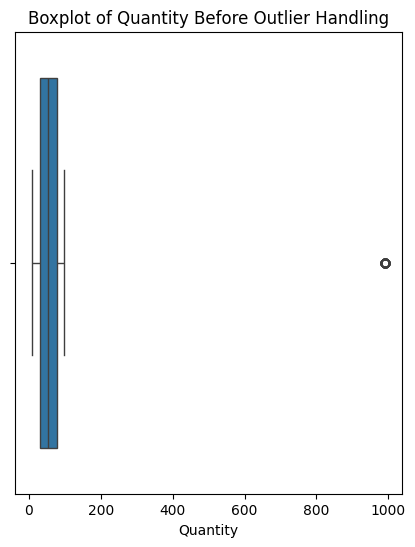

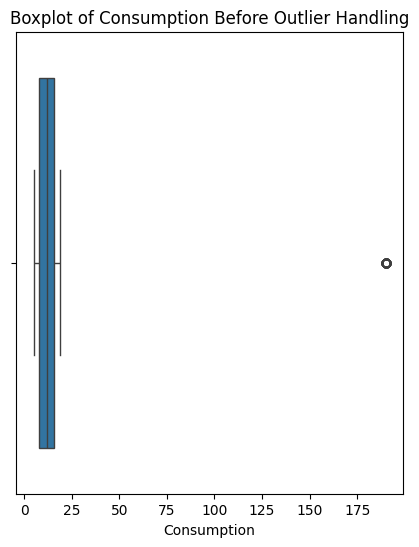

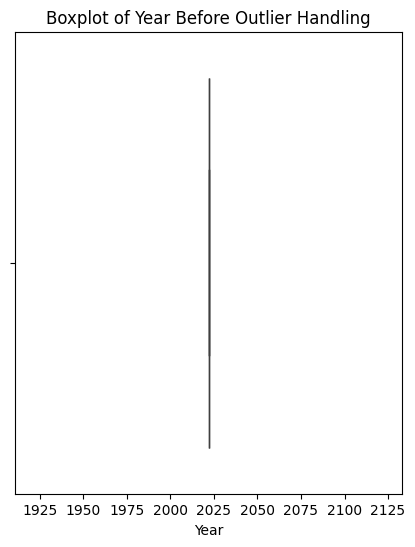

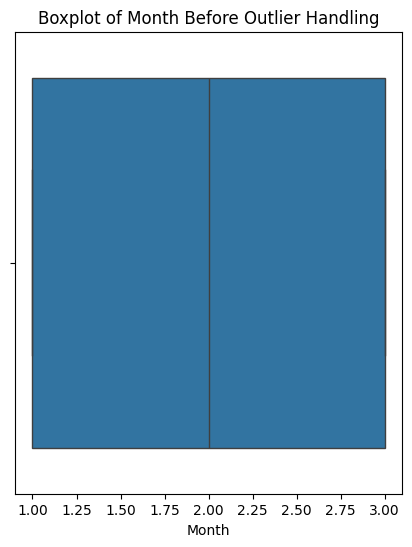

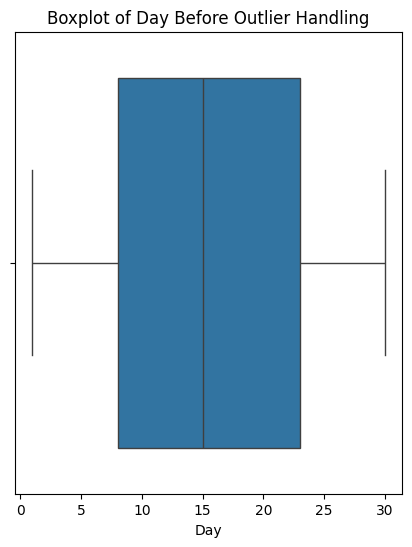

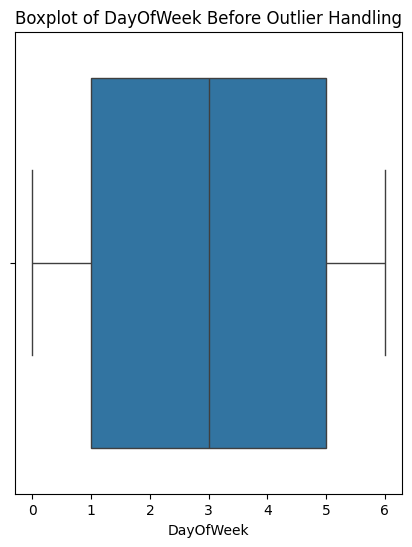

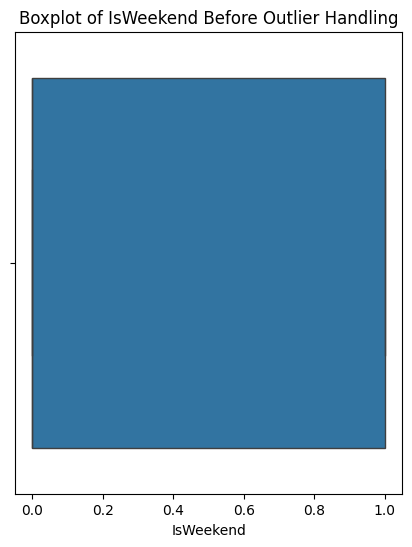

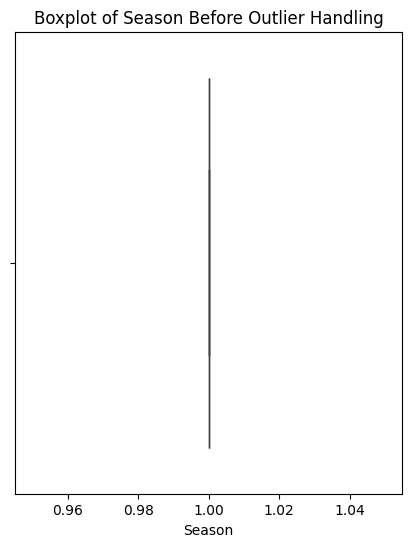

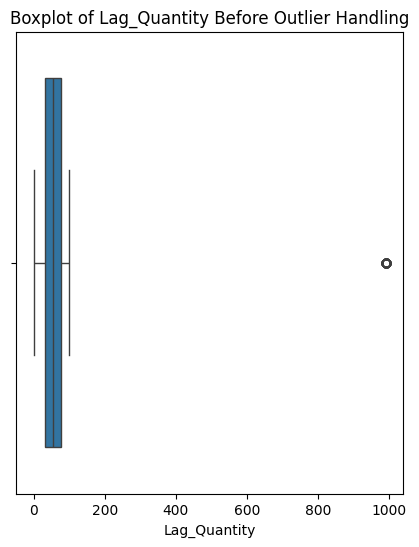

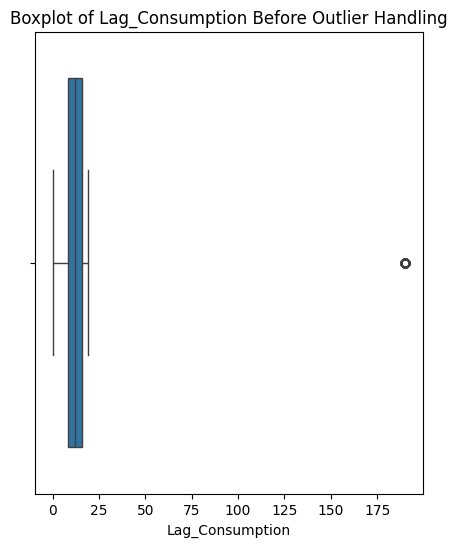

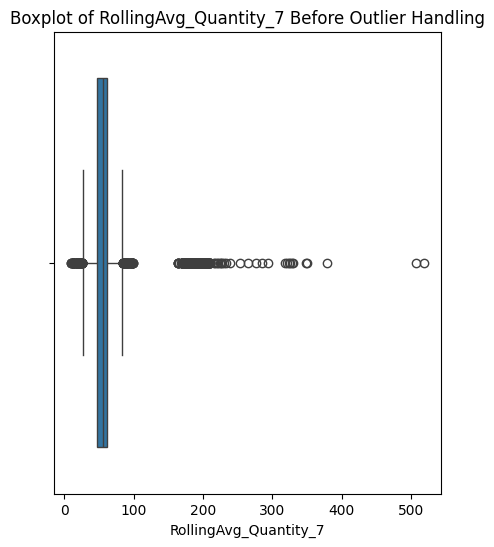

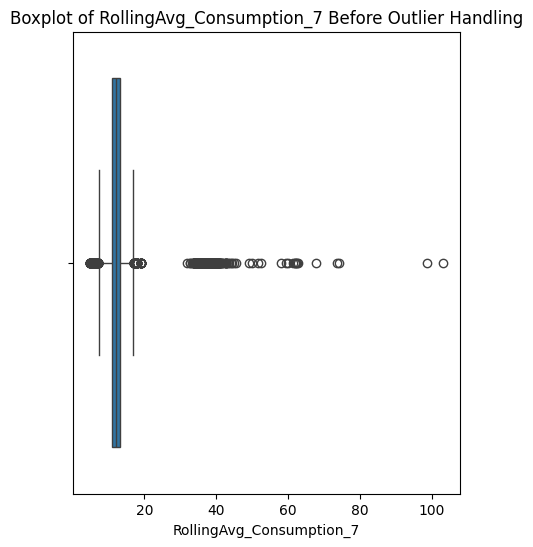

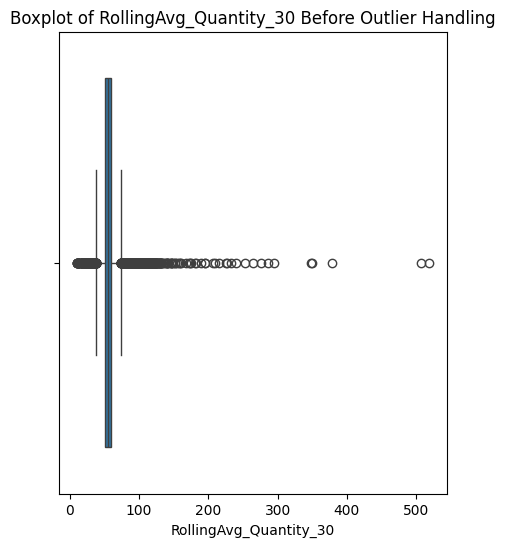

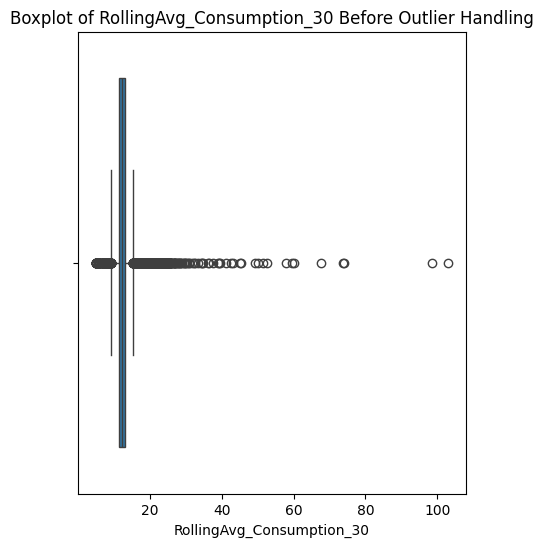

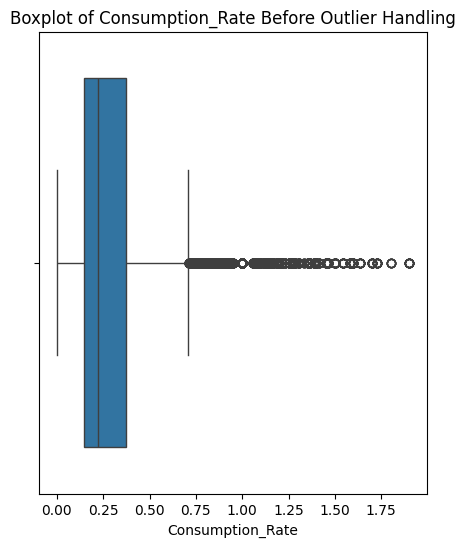

In [16]:
#step9 analysing using boxplot
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(5,6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} Before Outlier Handling")
    plt.show()


In [17]:
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return df[(df[column] < lower_fence) | (df[column] > upper_fence)]

# Check outliers for numerical columns
num_cols = ['Quantity', 'Consumption', 'RollingAvg_Quantity_7', 'RollingAvg_Consumption_7']
outliers = {col: detect_outliers(df, col).shape[0] for col in num_cols}

# Display outlier counts
print("Outliers per Column:", outliers)

Outliers per Column: {'Quantity': 92, 'Consumption': 92, 'RollingAvg_Quantity_7': 779, 'RollingAvg_Consumption_7': 769}


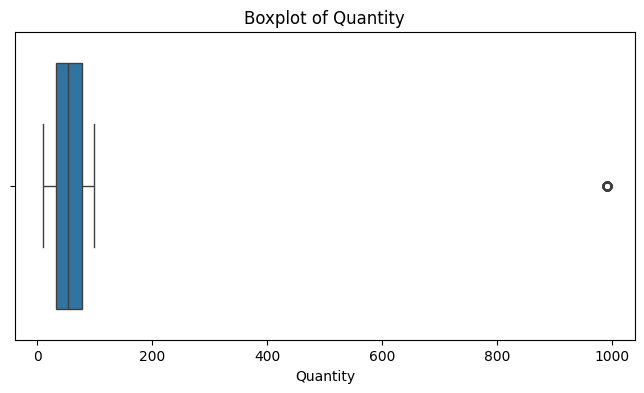

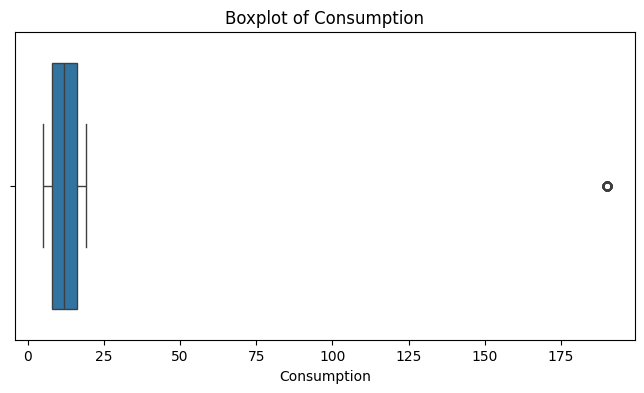

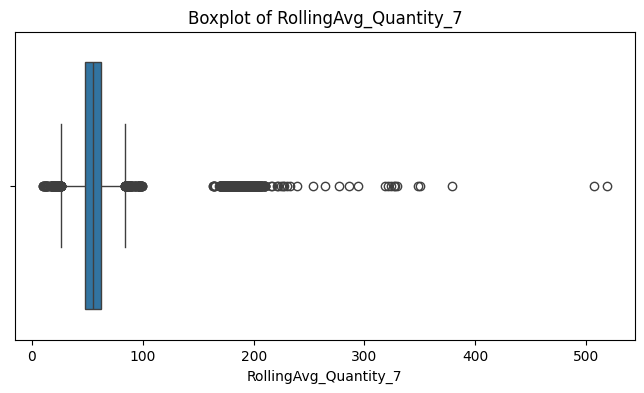

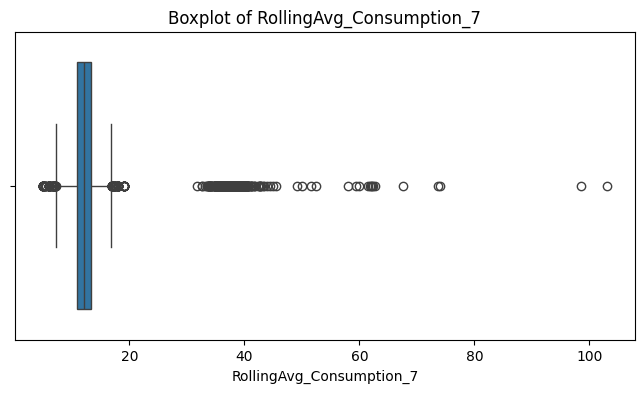

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


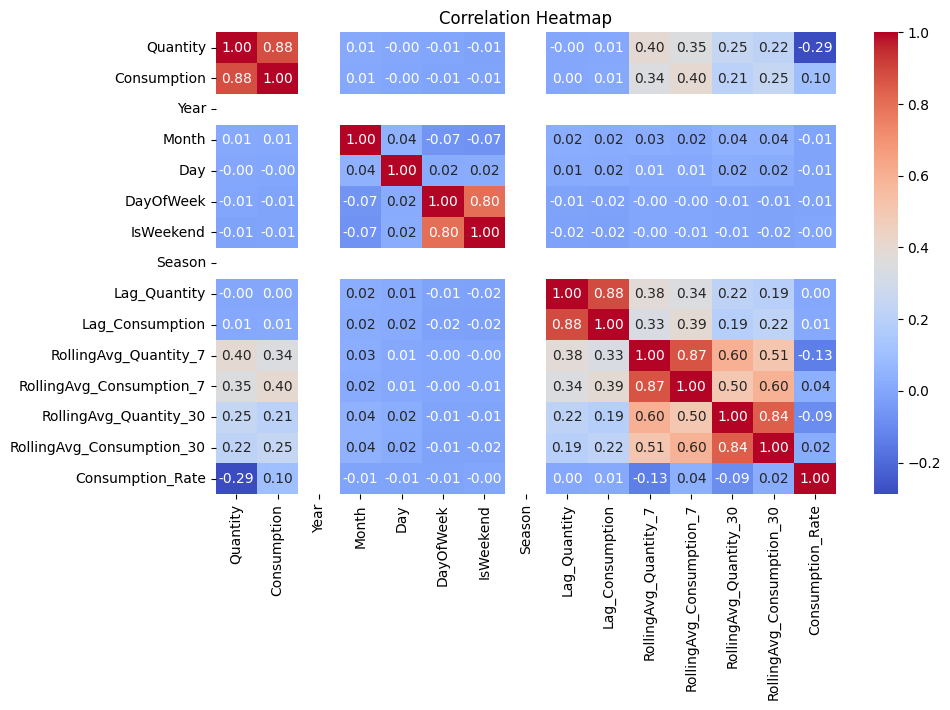

In [19]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


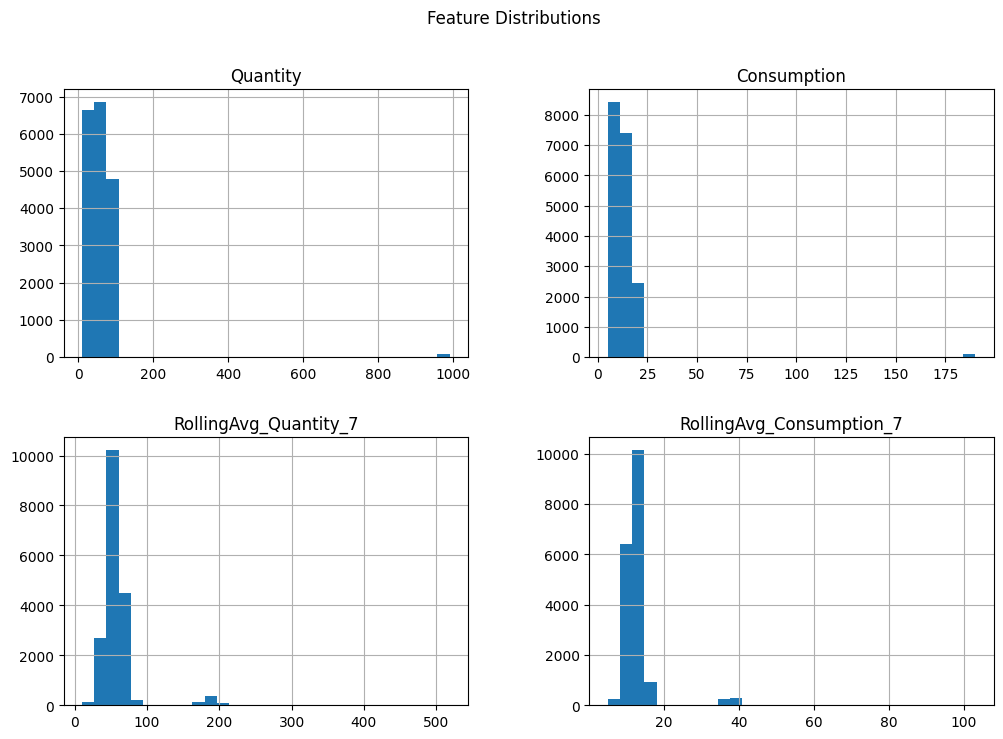

In [20]:
# Plot distributions of key numerical features
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


Data Visualization

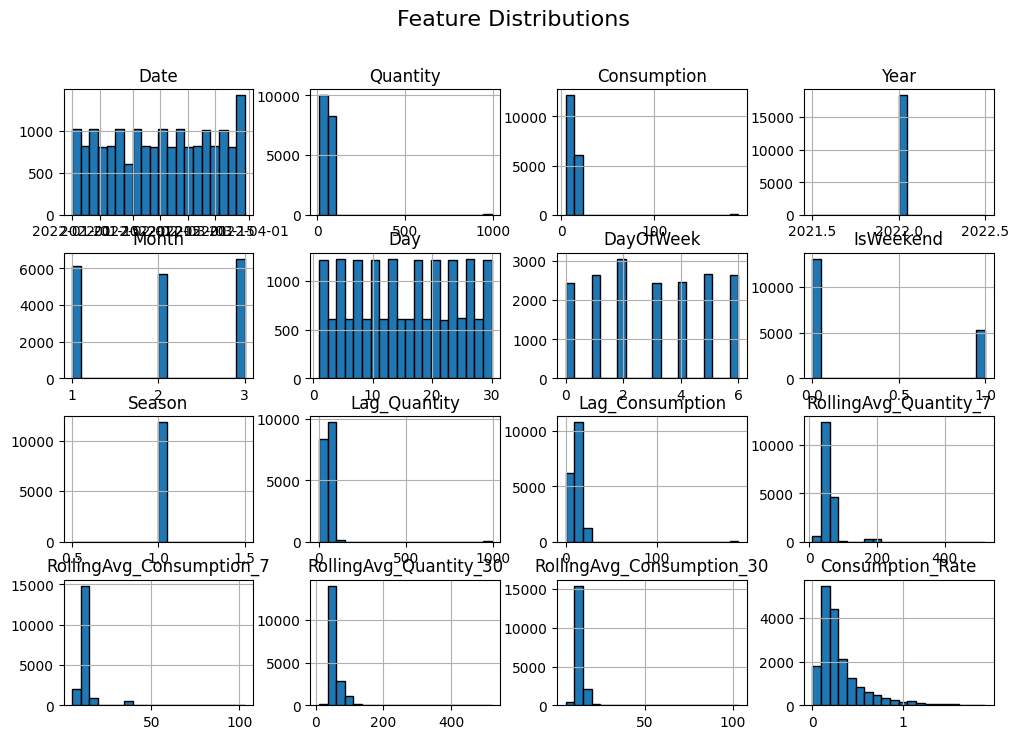

In [21]:
# 1. Histogram and KDE plots for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

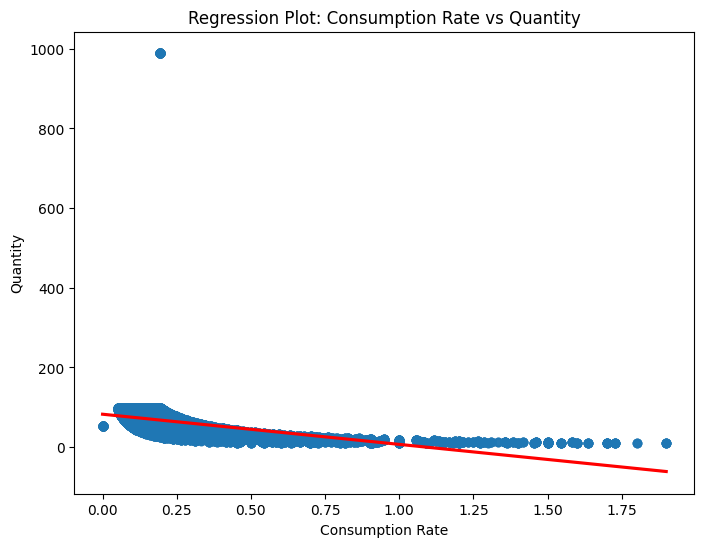

In [22]:
# 2. Regression Plot: Consumption Rate vs Quantity
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Consumption_Rate"], y=df["Quantity"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Consumption Rate")
plt.ylabel("Quantity")
plt.title("Regression Plot: Consumption Rate vs Quantity")
plt.show()

C:\Users\VENKATESHWAR REDDY\AppData\Local\Temp\ipykernel_20732\1422946021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["RollingAvg_Quantity_7_bins"], y=df["Quantity"], palette="viridis")


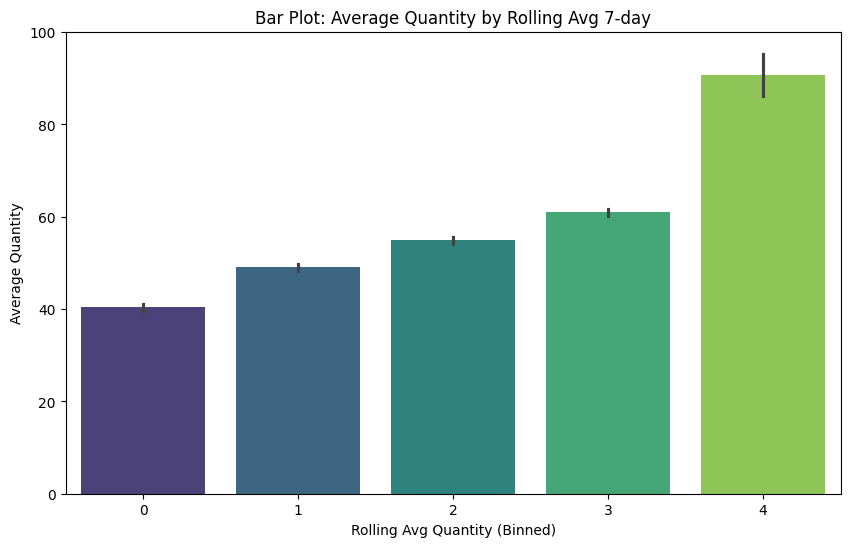

In [23]:
# 3. Bar Plot: Average Quantity by Rolling Avg 7-day Bins
df["RollingAvg_Quantity_7_bins"] = pd.qcut(df["RollingAvg_Quantity_7"], q=5, labels=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=df["RollingAvg_Quantity_7_bins"], y=df["Quantity"], palette="viridis")
plt.xlabel("Rolling Avg Quantity (Binned)")
plt.ylabel("Average Quantity")
plt.title("Bar Plot: Average Quantity by Rolling Avg 7-day")
plt.show()


C:\Users\VENKATESHWAR REDDY\AppData\Local\Temp\ipykernel_20732\3063743326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df["Quantity"], palette="coolwarm")


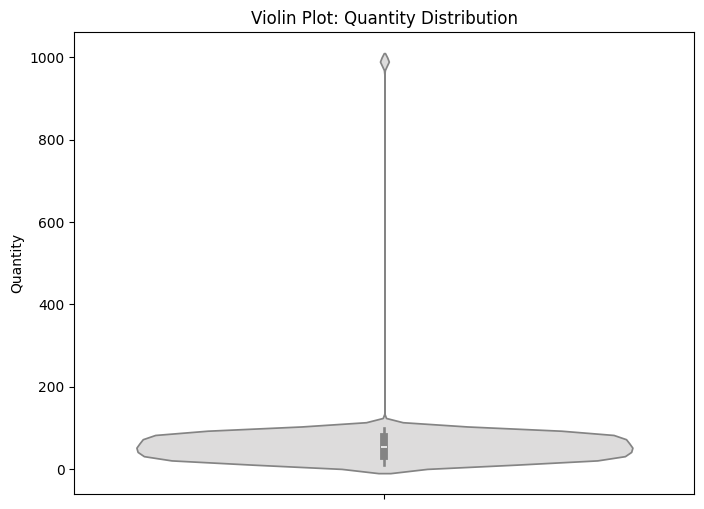

In [24]:
# 4. Violin Plot: Distribution of Quantity
plt.figure(figsize=(8, 6))
sns.violinplot(y=df["Quantity"], palette="coolwarm")
plt.title("Violin Plot: Quantity Distribution")
plt.show()

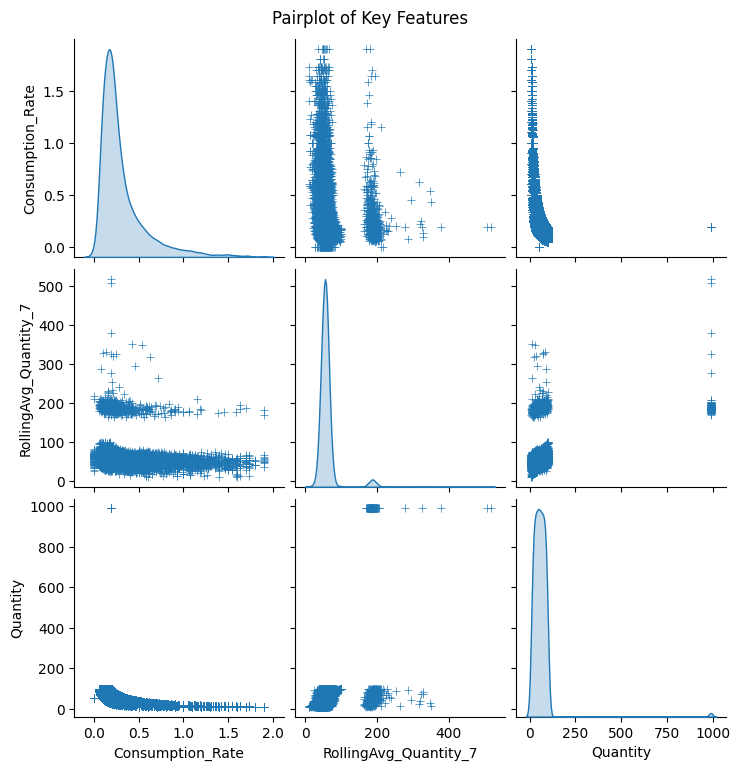

In [25]:
# 5. Pairplot for relationships between multiple numerical features
sns.pairplot(df[["Consumption_Rate", "RollingAvg_Quantity_7", "Quantity"]], diag_kind="kde", markers="+")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

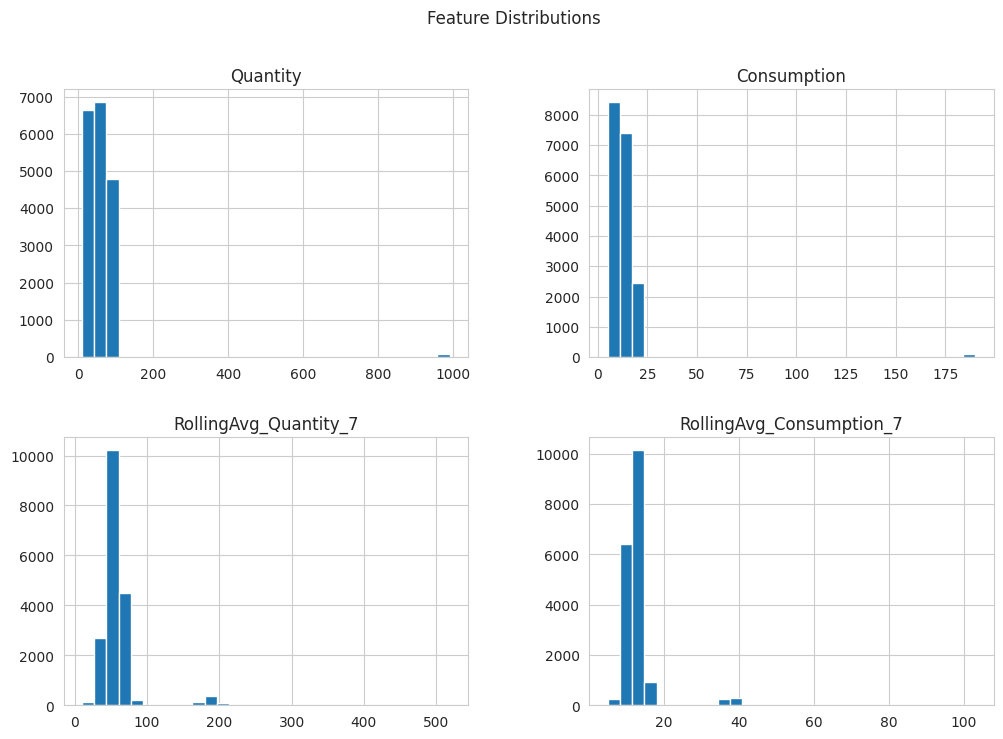

In [128]:
# Plot distributions of key numerical features
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


In [129]:
# !pip install statsmodels
# !pip install prophet

In [130]:
# !pip install prophet


In [131]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from prophet import Prophet
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Load the processed dataset

# # 1️⃣ Data Preparation
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.groupby('Date').agg({'Quantity': 'sum'}).reset_index()

# # Split data into train (80%) and test (20%)
# train_size = int(len(df) * 0.8)
# train, test = df[:train_size], df[train_size:]

# # 2️⃣ ARIMA Model
# arima_model = ARIMA(train['Quantity'], order=(5,1,0))
# arima_fit = arima_model.fit()
# arima_predictions = arima_fit.forecast(steps=len(test))

# # Evaluate ARIMA
# mae_arima = mean_absolute_error(test['Quantity'], arima_predictions)
# rmse_arima = np.sqrt(mean_squared_error(test['Quantity'], arima_predictions))
# print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")

# # 3️⃣ Prophet Model
# df_prophet = df.rename(columns={'Date': 'ds', 'Quantity': 'y'})
# prophet_model = Prophet()
# prophet_model.fit(df_prophet[:train_size])
# future = prophet_model.make_future_dataframe(periods=len(test))
# forecast = prophet_model.predict(future)

# # Evaluate Prophet
# prophet_predictions = forecast['yhat'].iloc[train_size:]
# mae_prophet = mean_absolute_error(test['Quantity'], prophet_predictions)
# rmse_prophet = np.sqrt(mean_squared_error(test['Quantity'], prophet_predictions))
# print(f"Prophet MAE: {mae_prophet}, RMSE: {rmse_prophet}")

# # 4️⃣ Plot Predictions
# plt.figure(figsize=(10,5))
# plt.plot(df['Date'], df['Quantity'], label='Actual')
# plt.plot(test['Date'], arima_predictions, label='ARIMA Predictions')
# plt.plot(test['Date'], prophet_predictions, label='Prophet Predictions', linestyle='dashed')
# plt.legend()
# plt.title("Demand Forecasting - ARIMA vs Prophet")
# plt.show()

# # Save results
# df.to_csv("demand_forecast_results.csv", index=False)
# print("✅ Demand Forecasting Completed. Predictions saved.")


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecting features and target
features = ["Consumption", "Lag_Quantity", "Lag_Consumption",
            "RollingAvg_Quantity_7", "RollingAvg_Quantity_30",
            "RollingAvg_Consumption_7", "RollingAvg_Consumption_30",
            "Consumption_Rate", "IsWeekend"]
target = "Quantity"

# Dropping any remaining NaN values (precautionary step)
df = df.dropna()

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,14.865691,347.594515,18.643887,0.929570
Decision Tree,0.000817,0.000817,0.028583,1.000000
Random Forest,0.013706,0.001411,0.037557,1.000000
SVR,23.961833,4252.410572,65.210510,0.138377
KNN,20.757462,636.801275,25.234922,0.870971


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_optimized)
mse = mean_sq
squared_error(y_test, y_pred_optimized)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_optimized)

# Return best parameters and new performance metrics
best_params, {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "inventory_data_enriched.csv"
df = pd.read_csv(file_path)

# Fix missing values in 'Quantity'
df = df.dropna(subset=['Quantity'])  # Drop rows where Quantity is NaN

# Select features and target variable
X = df[['Consumption_Rate', 'RollingAvg_Quantity_7']]
y = df['Quantity']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, "quantity_model.pkl")

# Evaluate model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model saved successfully as 'quantity_model.pkl'")
print({"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2})


In [ ]:
import pandas as pd
import joblib

# Load the trained Random Forest model
model = joblib.load("quantity_model.pkl")  # Make sure to save your trained model as 'quantity_model.pkl'

# Function for real-time quantity prediction
def predict_quantity():
    while True:
        try:
            # User input for numerical features
            consumption_rate = float(input("Enter Consumption Rate (or '-1' to exit): ").strip())
            if consumption_rate == -1:
                print("Exiting...")
                break

            rolling_avg_7 = float(input("Enter Rolling Avg Quantity (7-day): ").strip())

            # Create DataFrame with correct feature names
            input_data = pd.DataFrame([[consumption_rate, rolling_avg_7]],
                                      columns=['Consumption_Rate', 'RollingAvg_Quantity_7'])

            # Predict Quantity
            predicted_quantity = model.predict(input_data)[0]
            print(f"Predicted Quantity: {predicted_quantity:.2f}")

        except ValueError:
            print("Invalid input! Please enter numerical values.")

# Run the prediction function
predict_quantity()


In [ ]:
 df[['Consumption_Rate', 'RollingAvg_Quantity_7', 'Quantity']]

In [ ]:
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Selecting relevant columns
features = ["Consumption_Rate", "RollingAvg_Quantity_7"]
target = "Quantity"

# Drop missing values
df = df.dropna(subset=features + [target])

# Splitting into features and target variable
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = xgb_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Save model and scaler
joblib.dump(xgb_model, "quantity_model.pkl")
joblib.dump(scaler, "scaler.pkl")


In [ ]:
import pandas as pd
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("quantity_model.pkl")  # Ensure this file exists
scaler = joblib.load("scaler.pkl")  # Ensure this file exists

# Function for real-time quantity prediction
def predict_quantity():
    while True:
        try:
            # User input for numerical features
            consumption_rate = float(input("Enter Consumption Rate (or '-1' to exit): ").strip())
            if consumption_rate == -1:
                print("Exiting...")
                break

            rolling_avg_7 = float(input("Enter Rolling Avg Quantity (7-day): ").strip())

            # Create DataFrame with correct feature names
            input_df = pd.DataFrame([[consumption_rate, rolling_avg_7]],
                                    columns=["Consumption_Rate", "RollingAvg_Quantity_7"])

            # Apply scaling (fixing the issue)
            input_data_scaled = scaler.transform(input_df)

            # Predict Quantity
            predicted_quantity = model.predict(input_data_scaled)[0]
            print(f"Predicted Quantity: {predicted_quantity:.2f}")

        except ValueError:
            print("Invalid input! Please enter numerical values.")

# Run the prediction function
predict_quantity()


In [ ]:
df.columns